# [Chapter 2-2] R-Graphics tool(2)
1.Visualization of K-nearest neighborhood method


1. Visualization of K-nearest neighborhood method
 
 (1) Regression


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

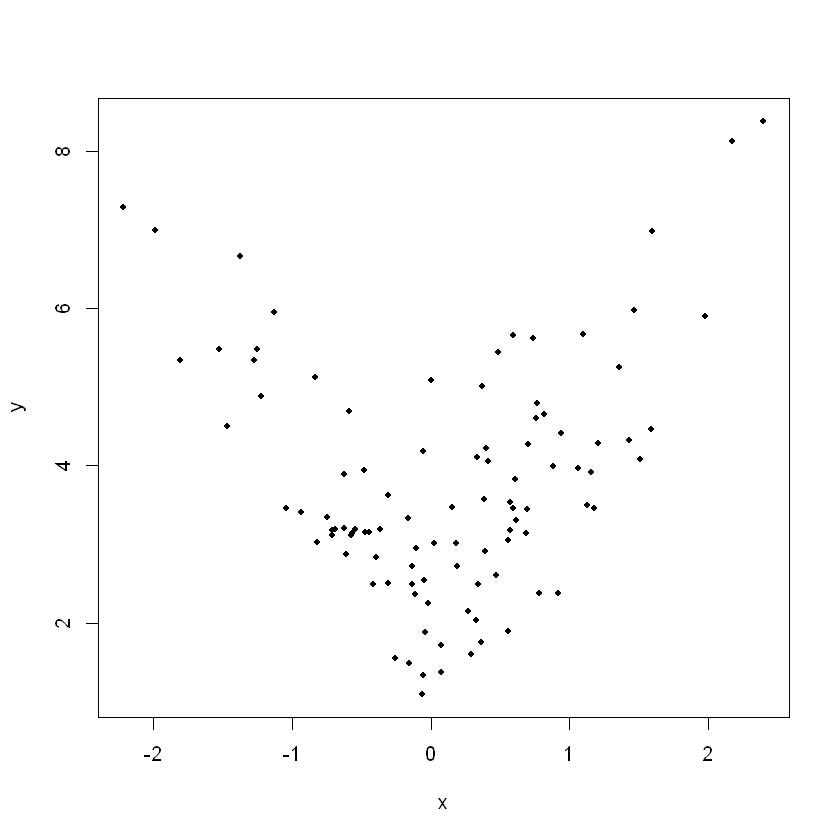

In [2]:
# Regression

# 모델의 형태 yi=3+x2i+ϵi (ϵi∼iid(0,1))
set.seed(1)
x <- sort(rnorm(100)) #랜덤노말
y<- 3+x^2 + rnorm(100)
plot(x, y, pch = 20)

##### Regression 회귀분석 
lm(y ~ x)

y는 x로부터 설명된다

현재 데이터로부터 직선 모델로 가장 잘 설명되는 직선을 찾아라

데이터 포인트

    x = predictor
    y = response

- 가정 1. 

- 가정 2. 

In [5]:
fit = lm(y~x) #저장
coef = fit$coefficient
str(fit)

List of 12
 $ coefficients : Named num [1:2] 3.757 0.149
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "x"
 $ residuals    : Named num [1:100] 3.858 3.539 1.859 1.95 0.971 ...
  ..- attr(*, "names")= chr [1:100] "1" "2" "3" "4" ...
 $ effects      : Named num [1:100] -37.727 1.33 1.007 1.18 0.217 ...
  ..- attr(*, "names")= chr [1:100] "(Intercept)" "x" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:100] 3.43 3.46 3.49 3.53 3.54 ...
  ..- attr(*, "names")= chr [1:100] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:100, 1:2] -10 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:100] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "x"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.1 1.21
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 98
 $ xlevels      : Named li

LIST의 형태

    리스트에서 원소를 가져오기 위해 체인을 확인해야 함!!
    체인의 붙은 객체를 확인해야함 BY $


(Intercept) 
   3.756537

x 
0.1488341

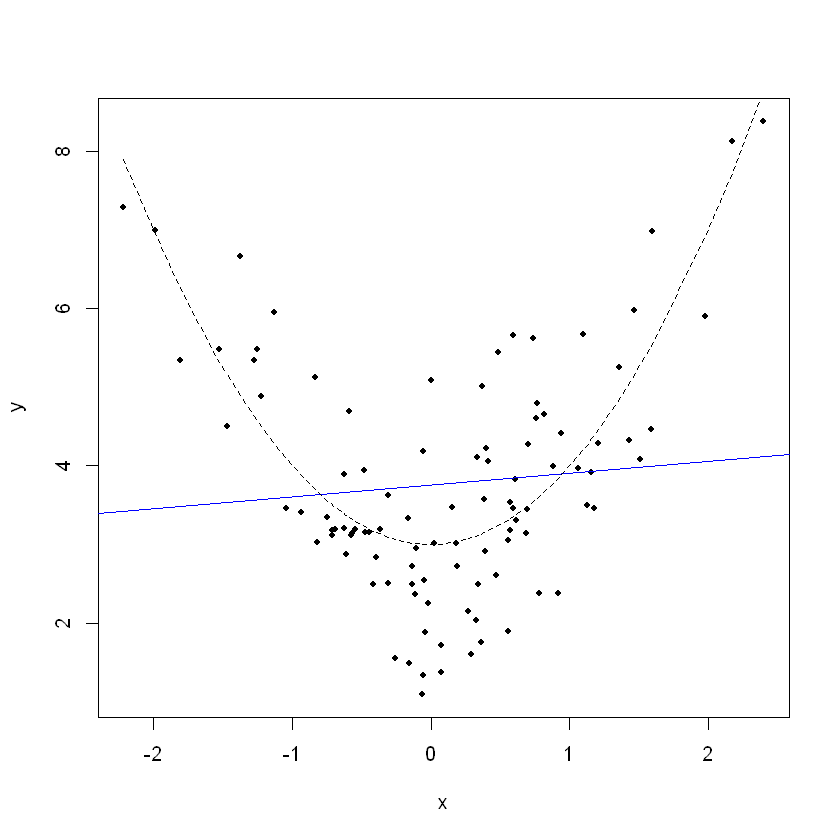

In [12]:
coef[1]
coef[2]

#lm에 fit 한 것을 그릴수 있음 = by abline
# a = 절편
# b = 기울기
plot(x, y, pch=20)
abline(a=fit$coefficients[1], b=fit$coefficients[2], col='blue')
yTrueMean = 3+x^2
lines(x, yTrueMean , lty=2, col='black')

#모델 스페이스의 결정
    
   - 간단한 모델을 활용 -> model bias 발생
   - 복잡한 모델을 활용 -> model bias가 없어지지만, 과적합되며 모델의 성능을 떨어뜨림


##### # k-nearest algorithm
    y^(x)=1k∑i∈Nk(x)yi 

   - y^(x): estimates of y for a given x
   - Nk(x): the index set of xi that are k-nearest to x. 
       (x와 가장 가까운 x값에 대한 인덱스,k개)
   - Nk(x) is computed by knnx.indexin FNN library
   

   

In [16]:
install.packages('FNN')
library(FNN)

Installing package into 'C:/Users/renz/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'FNN' is in use and will not be installed"

In [18]:
knnx.index(x, 0, k = 10) 
#x벡터 중에서 x=0에서 가까운 위치의 벡터순서를 알려줌

x[47]
x[46]

idx <- c(knnx.index(x, 0, k = 10))
idx



[1] 0.001105352

[1] -0.01619026

[1] 47 46 48 45 44 43 42 41 49 50

[1] 47 46 48 45 44 43 42 41 49 50

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): 객체 'red'를 찾을 수 없습니다


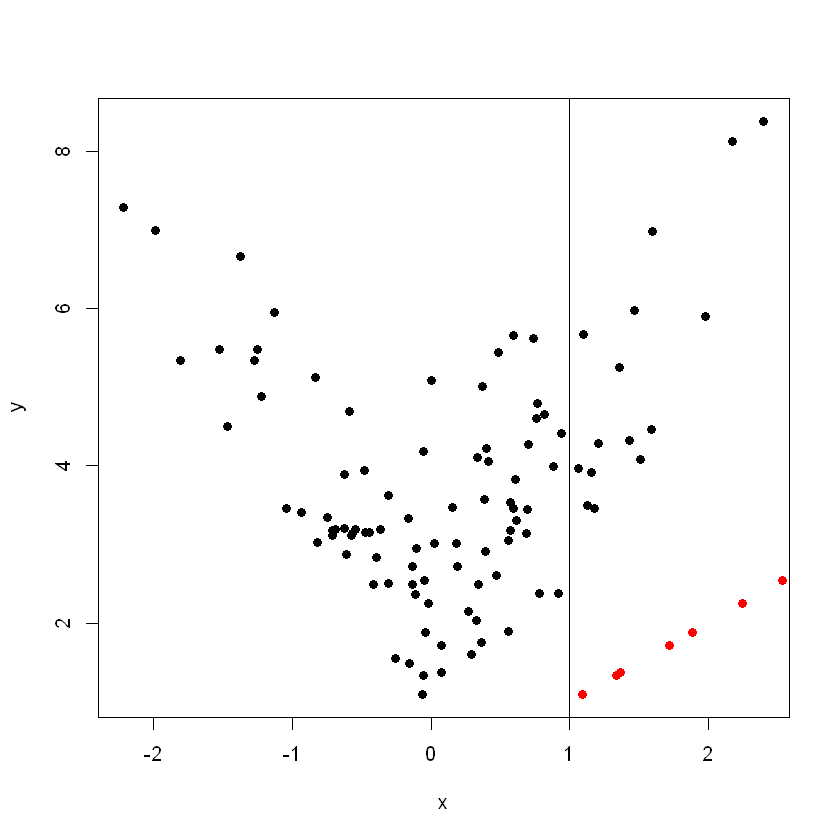

In [32]:
a = knnx.index(x, 0, k = 10) 
#x벡터 중에서 x=0에서 가까운 위치의 벡터순서를 알려줌

idx <- a[1,] #찾고자하는 점의 위치
plot(x,y,pch=19)
points(y[idx],y[idx],pch = 19,col='red')
abline(v=1,h=0)
abline(h=mean(y[idx]),col=red,lty = 2) #x=0에서 Y hat^